In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold

# Read ArchiveII

In [2]:
df = pd.read_csv('../data/ArchiveII.csv')
df_ = df.query('len <= 128')
df_

,id,sequence,structure,base_pairs,len
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115
3,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75
5,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128
6,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111
...,...,...,...,...,...
3857,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120
3859,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114
3860,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88
3862,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120


In [3]:
print('No max len')
print(df['id'].str.split('_').str[0].value_counts())
print('Max len = 128')
print(df_['id'].str.split('_').str[0].value_counts())

No max len
id
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64
Max len = 128
id
5s        1269
tRNA       557
srp        494
16s          4
tmRNA        1
RNaseP       1
Name: count, dtype: int64


In [4]:
df_['fam'] = df_['id'].str.split('_').str[0]
df_ = df_.query('fam not in ["16s", "tmRNA", "RNaseP"]')
# df_.to_csv('data/ArchiveII_max_length_128.csv', index=False)

/tmp/ipykernel_681247/3631363652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['fam'] = df_['id'].str.split('_').str[0]


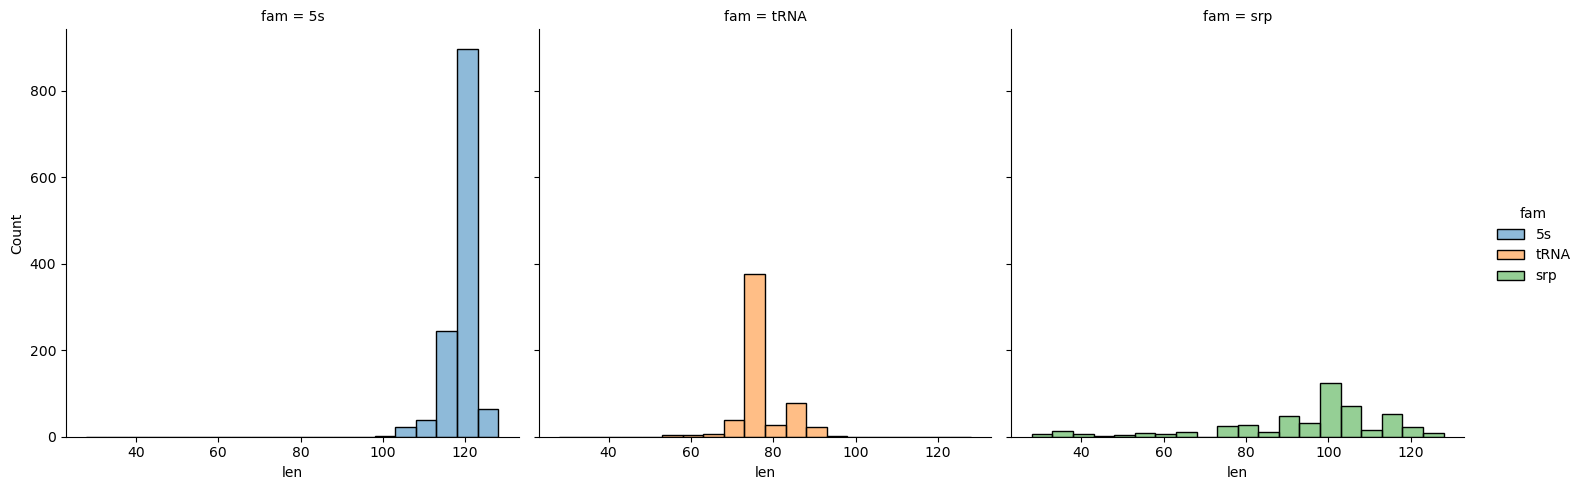

In [5]:
sns.displot(data=df_, x="len", hue="fam", col="fam")

# Random KFolds

In [6]:


def run_kfold(dataset_path, k=5, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, batch_size=4, max_len=128):
    assert train_ratio + val_ratio + test_ratio == 1.0, "La suma de las proporciones debe ser 1.0"

    data = pd.read_csv(dataset_path)
    kfold = KFold(n_splits=k, shuffle=True, random_state=42 )

    for fold, (train_val_idx, test_idx) in enumerate(kfold.split(data)):
        # Divide train+val y test
        train_val_data = data.iloc[train_val_idx]
        test_data = data.iloc[test_idx]
        
        # Divide train y val dentro del conjunto train_val
        train_data, val_data = train_test_split(train_val_data, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

        # Guarda las divisiones en CSV para consistencia
        train_path = f"data/ArchiveII-KFold/fold_{fold}_train.csv"
        val_path =   f"data/ArchiveII-KFold/fold_{fold}_val.csv"
        test_path =  f"data/ArchiveII-KFold/fold_{fold}_test.csv"
        
        train_data.to_csv(train_path, index=False)
        val_data.to_csv(val_path, index=False)
        test_data.to_csv(test_path, index=False)


In [7]:
# run_kfold('data/ArchiveII_max_length_128.csv')

In [8]:

kfold_path = '../data/ArchiveII-KFold/common/'
dfs = []
for file in os.listdir(kfold_path):
    df = pd.read_csv(kfold_path + file)
    df['fold'] = file.split('_')[1]
    df['partition'] = file.split('_')[-1].split('.')[0]
    dfs.append(df)
df = pd.concat(dfs)
df

,id,sequence,structure,base_pairs,len,fam,fold,partition
0,5s_Sabellastarte-japonica-1,GCCUACGGCCAUACCAUGCUGAAUACACCCGUUCUCGUCCGAUCAC...,((((((.((....((((((((.....((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s,0,val
1,5s_Taxus-baccata-1,GAGUGCGAUCAUACCAGCGUUUGUGCACCGGAUCCCAUCAGAACUC...,(.(((((((....(((((((......((((((............))...,"[[1, 118], [3, 116], [4, 115], [5, 114], [6, 1...",121,5s,0,val
2,5s_Onchocerca-volvulus-1,GUCGACGACCAUACCUCGUUGAAAGCACGACAUCUCGUCCGAUCUG...,(((.(((((....((.(((((.....((((((............))...,"[[1, 118], [2, 117], [3, 116], [5, 114], [6, 1...",121,5s,0,val
3,5s_Staphylococcus-aureus-3,UCUGGUGAAUAUAGCAAGGAGGUCACACCUGUUCCCAUGCCGAACA...,((((((((.....((((((((.....((((((.............)...,"[[1, 114], [2, 113], [3, 112], [4, 111], [5, 1...",115,5s,0,val
4,5s_Frankia-sp.-2,GUUUCGGUGGUUUUGGCGAAGGGGAAACGCCCGGUCUCAUUCCGAA...,(.((((((((.....((((((((.....((((((...............,"[[1, 120], [3, 118], [4, 117], [5, 116], [6, 1...",120,5s,0,val
...,...,...,...,...,...,...,...,...
323,5s_Methanothermobacter-thermautotrophicus-5,GUUGGCGGUCAUGGCGUGGGGUUAAUACCUGAUCUCGUUUCGAUCU...,(((((((((....(((((((......((((((.............)...,"[[1, 120], [2, 119], [3, 118], [4, 117], [5, 1...",124,5s,2,val
324,tRNA_tdbR00000540-Homo_sapiens-9606-Ini-CAU,AGCAGAGUGGCGCAGCGGAAGCGUGCUGGGCCCAUAACCCAGAGGU...,(((((((..((((.......)))).(((((.......))))).......,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,tRNA,2,val
325,tRNA_tdbR00000263-Rattus_norvegicus-10116-Leu-AA,AGUCAGGAUGGCCGAGUGGUCUAAGGCGCCAGACUCAAGUUCUGGU...,.(((((((..(((...........)))((((((.......))))))...,"[[2, 82], [3, 81], [4, 80], [5, 79], [6, 78], ...",86,tRNA,2,val
326,5s_Streptomyces-purpureus-1,GUUUCGGUGGUCAUAGCGUUAGGGAAACGCCCGGUUACAUUCCGAA...,((.(((((((.....(((..(((.....((((((...............,"[[1, 119], [2, 118], [4, 117], [5, 116], [6, 1...",120,5s,2,val


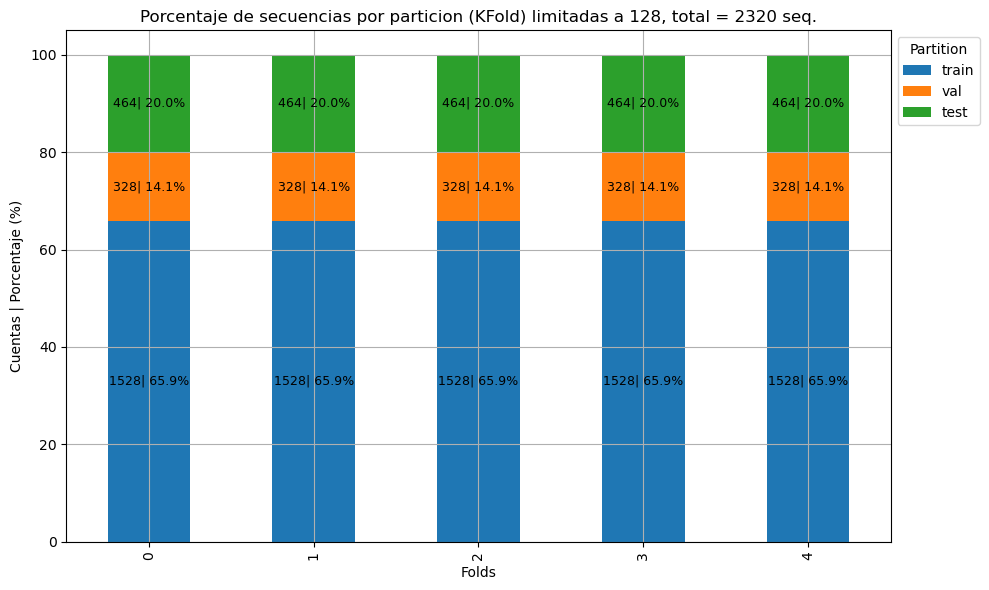

In [9]:
# Grafico de barras apiladas en forma porcentual

df_grouped = df.groupby(['fold', 'partition'])['id'].count().reset_index().sort_values('id')

df_grouped['percentage'] = df_grouped['id'] / 2320 * 100
pivot_df = df_grouped.pivot(index='fold', columns='partition', values='percentage')
pivot_df = pivot_df[['train', 'val', 'test']]  # Orden explícito de las columnas

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

# Agregar valores numéricos a las barras
for container in bars.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Mostrar solo si hay un valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{height*2320/100:.0f}| {height:.1f}%',  # Valor a mostrar
                ha='center', va='center', fontsize=9, color='black'
            )

# Configuración del gráfico
plt.title("Porcentaje de secuencias por particion (KFold) limitadas a 128, total = 2320 seq.")
plt.xlabel("Folds")
plt.ylabel("Cuentas | Porcentaje (%)")
plt.legend(title="Partition",bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()


In [10]:
cond = df_splits['partition'] == 'train'
df_train_grouped = df[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 
cond = df_splits['partition'] == 'valid'
df_valid_grouped = df[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 
cond = df_splits['partition'] == 'test'
df_test_grouped = df[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 

# Preparamos los datos
train_data = df_train_grouped.copy()
train_data['dataset'] = 'Train'
valid_data = df_valid_grouped.copy()
valid_data['dataset'] = 'Valid'
test_data = df_test_grouped.copy()
test_data['dataset'] = 'Test'

# Concatenamos los dataframes y ordenamos
combined_df = pd.concat([train_data, valid_data, test_data])
combined_df['dataset'] = pd.Categorical(combined_df['dataset'], 
                                      categories=['Train', 'Valid', 'Test'],
                                      ordered=True)
combined_df = combined_df.sort_values(['dataset', 'fold'])

# Creamos el pivot table
pivot_df = pd.pivot_table(combined_df,
                         index=['dataset', 'fold'],
                         columns='fam',
                         values='id',
                         aggfunc='sum',
                         fill_value=0)

# Normalizar los valores a porcentajes
pivot_df_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_pct = pivot_df_pct.reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# Obtener las familias únicas (columnas)
families = [col for col in pivot_df_pct.columns if col not in ['dataset', 'fold']]


colors = sns.color_palette("rainbow", len(families))  
# Inicializar el bottom para las barras apiladas
bottom = np.zeros(len(pivot_df_pct))

# Crear las barras apiladas para cada familia
for fam, color in zip(families, colors):
    bars = ax.bar(
        range(len(pivot_df_pct)),
        pivot_df_pct[fam],
        bottom=bottom,
        label=fam,
        color=color
    )
    # Agregar los valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 1:  # Solo mostrar valores mayores al 1%
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bottom[i] + height/2,
                f'{height:.1f}',
                ha='center', va='center',
                fontsize=16, color='black'
            )
    
    bottom += pivot_df_pct[fam]

# Configurar los ticks del eje x
xticks = range(len(pivot_df_pct))

# Crear etiquetas personalizadas
xlabels = []
current_dataset = None
for _, row in pivot_df_pct.iterrows():
    if current_dataset != row.dataset:
        xlabels.append(f'{row.dataset}\nFold {row.fold}')
        current_dataset = row.dataset
    else:
        xlabels.append(f'Fold {row.fold}')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=90, fontsize=16)

# Agregar líneas verticales para separar los datasets
n_folds = len(pivot_df_pct.groupby('dataset').first())
current_pos = 0
for dataset in ['Train', 'Valid']:
    current_pos += len(pivot_df_pct[pivot_df_pct['dataset'] == dataset])
    ax.axvline(x=current_pos - 0.5, color='black', linestyle='-.')

# Configuración del gráfico
plt.title("Distribución porcentual de familias por partición y conjunto de datos", fontsize=16)
plt.xlabel("Dataset y Fold", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=16)
ax.set_ylim(0, 100)
plt.legend(title="Families", bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

NameError: name 'df_splits' is not defined

# cdhit_split

In [11]:
df_raw = pd.read_csv('../data/cdhit_split_raw.csv')
df_raw[df_raw['fold']==0].shape

(3864, 3)

In [12]:
df_raw['fam'] = df_raw['id'].str.split('_').str[0]
df_raw[df_raw['fold']==0]['fam'].value_counts()

fam
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64

In [13]:
df = pd.read_csv('../data/ArchiveII.csv')
df['fam'] = df['id'].str.split('_').str[0]
df['fam'].value_counts()

fam
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64

El dataset es igual al ArchiveII

In [14]:
df_raw_ = pd.merge(df_raw, df, how='left', left_on='id', right_on='id')

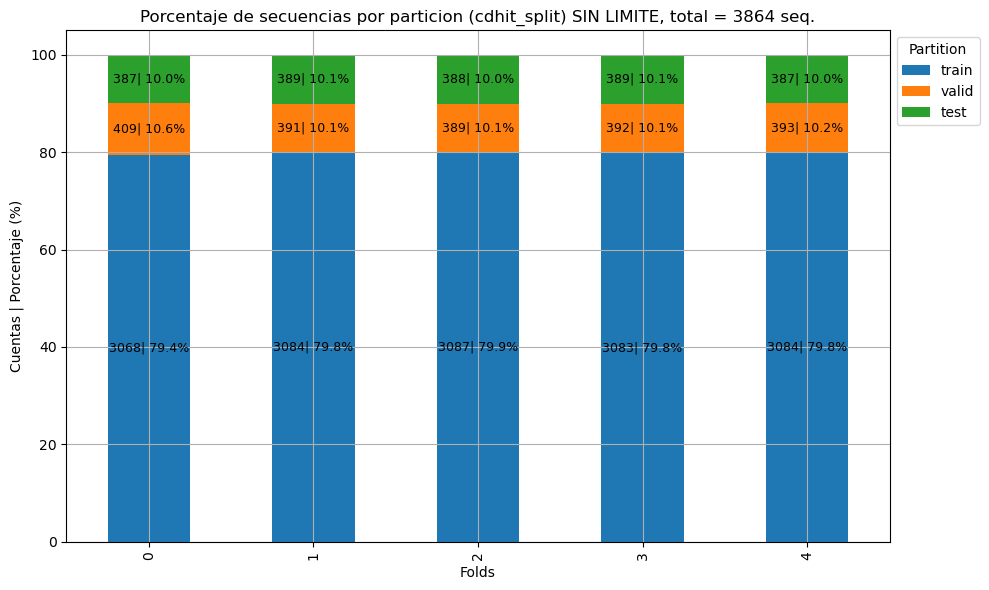

In [15]:
# Grafico de barras apiladas en forma porcentual

df_grouped = df_raw_.groupby(['fold', 'partition'])['id'].count().reset_index().sort_values('id')

df_grouped['percentage'] = df_grouped['id'] / 3864 * 100
pivot_df = df_grouped.pivot(index='fold', columns='partition', values='percentage')
pivot_df = pivot_df[['train', 'valid', 'test']]  # Orden explícito de las columnas

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

# Agregar valores numéricos a las barras
for container in bars.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Mostrar solo si hay un valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{height*3864/100:.0f}| {height:.1f}%',  # Valor a mostrar
                ha='center', va='center', fontsize=9, color='black'
            )

# Configuración del gráfico
plt.title("Porcentaje de secuencias por particion (cdhit_split) SIN LIMITE, total = 3864 seq.")
plt.xlabel("Folds")
plt.ylabel("Cuentas | Porcentaje (%)")
plt.legend(title="Partition",bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()


In [16]:

df = pd.read_csv('../data/ArchiveII_max_length_128.csv')
df_splits = pd.read_csv('../data/cdhit_split.csv')

In [17]:
display(f'df (ArchiveII_max_length_128):  {df.shape}')
display(df.head(5))
display(f'df_splits (cdhit_split): {df_splits.shape}')
display(df_splits.head(5))

'df (ArchiveII_max_length_128):  (2320, 6)'

,id,sequence,structure,base_pairs,len,fam
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,5s
2,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,tRNA
3,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128,5s
4,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111,srp


'df_splits (cdhit_split): (11600, 8)'

,id,sequence,structure,base_pairs,len,fam,fold,partition
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,0,test
1,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,1,train
2,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,2,train
3,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,3,train
4,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,4,train


In [18]:
df_join = pd.merge(df, df_splits, how='left', left_on='id', right_on='id')
# df_join.to_csv('../data/cdhit_split.csv', index=False)

In [19]:

print(f'df_join: {df_join.shape[0]}')

print(f'df_splits: {df_splits.shape[0]}')
print(f'df: {df.shape[0]}')
print(f'df restante: {df.shape[0]/38.64:.2f}%')


df_join: 11600
df_splits: 11600
df: 2320
df restante: 60.04%


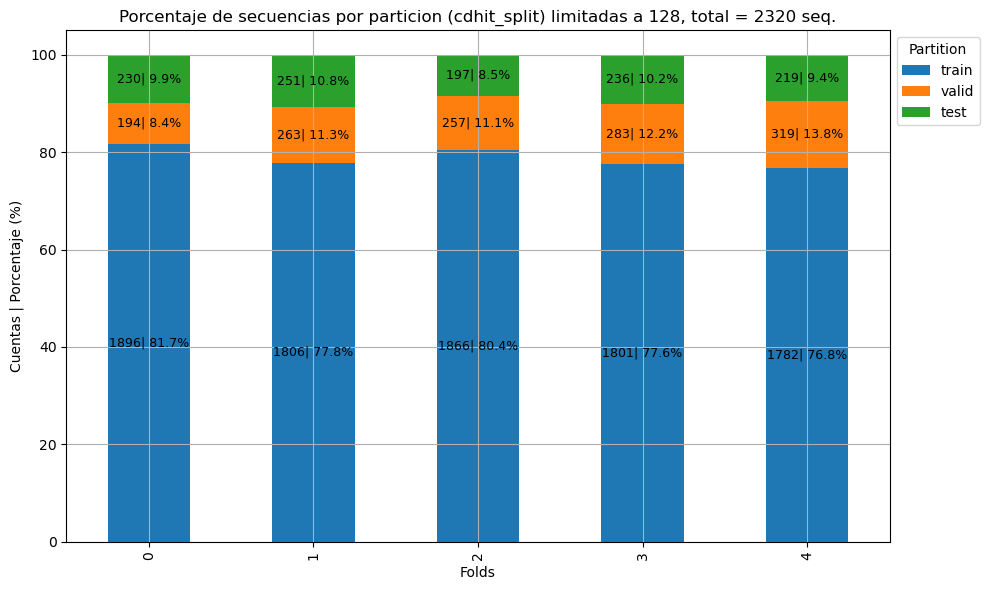

In [20]:
# Grafico de barras apiladas en forma porcentual

df_grouped = df_splits.groupby(['fold', 'partition'])['id'].count().reset_index().sort_values('id')

df_grouped['percentage'] = df_grouped['id'] / 2320 * 100
pivot_df = df_grouped.pivot(index='fold', columns='partition', values='percentage')
pivot_df = pivot_df[['train', 'valid', 'test']]  # Orden explícito de las columnas

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

# Agregar valores numéricos a las barras
for container in bars.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Mostrar solo si hay un valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{height*2320/100:.0f}| {height:.1f}%',  # Valor a mostrar
                ha='center', va='center', fontsize=9, color='black'
            )

# Configuración del gráfico
plt.title("Porcentaje de secuencias por particion (cdhit_split) limitadas a 128, total = 2320 seq.")
plt.xlabel("Folds")
plt.ylabel("Cuentas | Porcentaje (%)")
plt.legend(title="Partition",bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()


In [21]:
cond = df_splits['partition'] == 'train'
df_train_grouped = df_splits[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 
cond = df_splits['partition'] == 'valid'
df_valid_grouped = df_splits[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 
cond = df_splits['partition'] == 'test'
df_test_grouped = df_splits[cond].groupby(['fold', 'fam'])['id'].count().reset_index().sort_values('fold') 

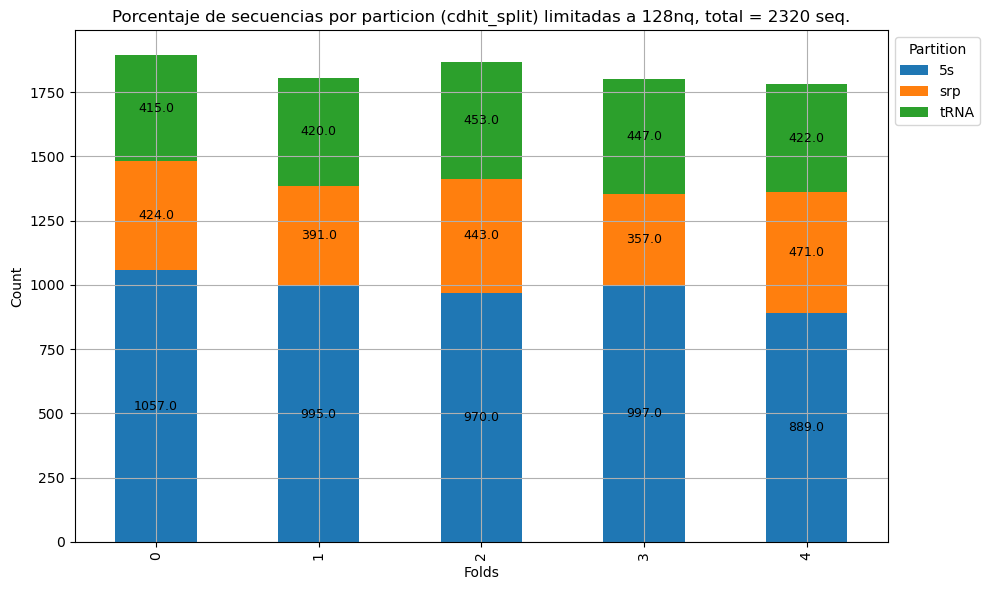

In [22]:
# Grafico de barras apiladas en forma porcentual 
 
pivot_df = df_train_grouped.pivot(index='fold', columns='fam', values='id') 

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

# Agregar valores numéricos a las barras
for container in bars.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Mostrar solo si hay un valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{height}',  # Valor a mostrar
                ha='center', va='center', fontsize=9, color='black'
            )

# Configuración del gráfico
plt.title("Porcentaje de secuencias por particion (cdhit_split) limitadas a 128nq, total = 2320 seq.")
plt.xlabel("Folds")
plt.ylabel("Count")
plt.legend(title="Partition",bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()


/tmp/ipykernel_681247/1283780592.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(combined_df,
/tmp/ipykernel_681247/1283780592.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_folds = len(pivot_df_pct.groupby('dataset').first())


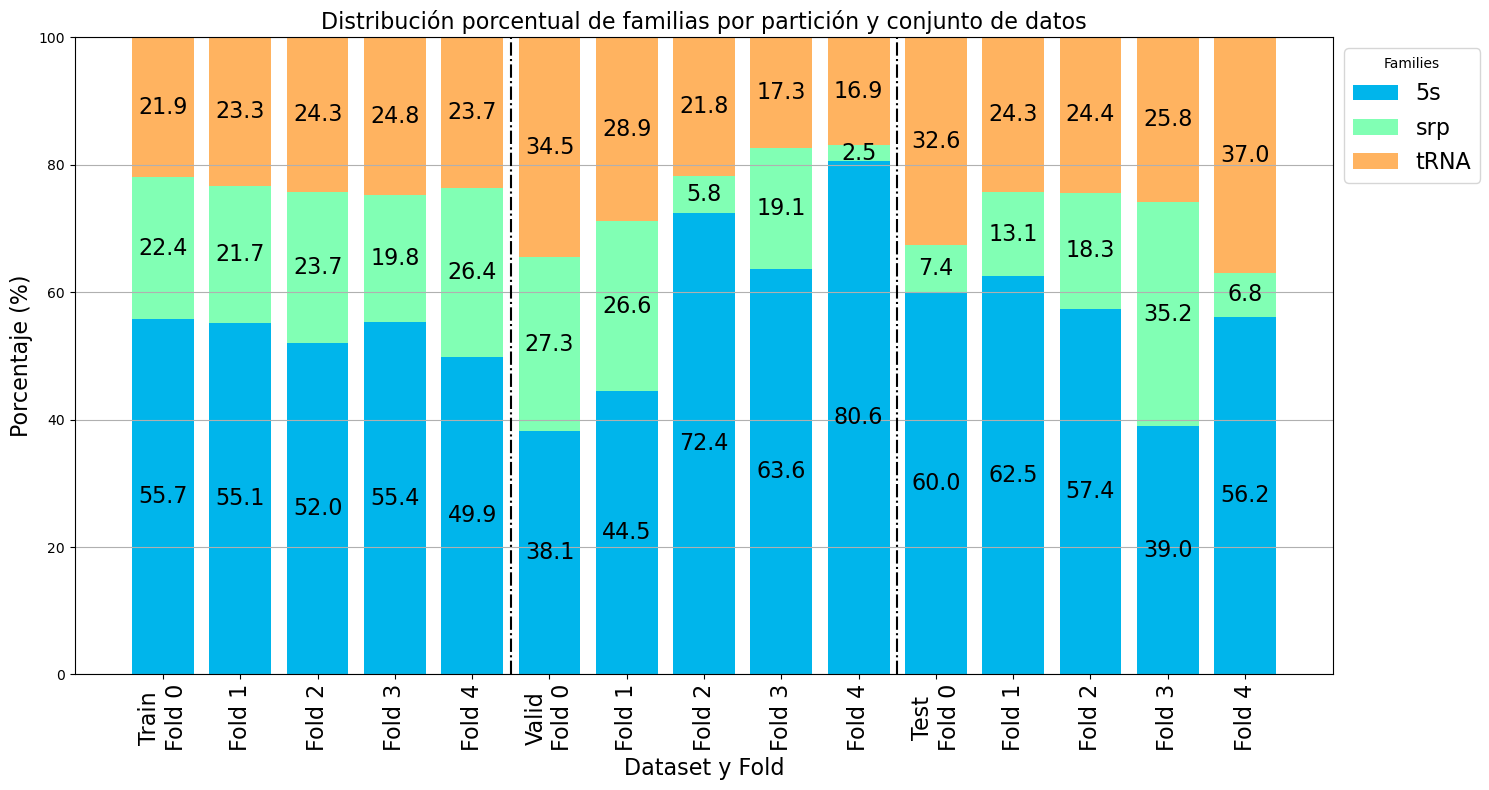

In [23]:


# Preparamos los datos
train_data = df_train_grouped.copy()
train_data['dataset'] = 'Train'
valid_data = df_valid_grouped.copy()
valid_data['dataset'] = 'Valid'
test_data = df_test_grouped.copy()
test_data['dataset'] = 'Test'

# Concatenamos los dataframes y ordenamos
combined_df = pd.concat([train_data, valid_data, test_data])
combined_df['dataset'] = pd.Categorical(combined_df['dataset'], 
                                      categories=['Train', 'Valid', 'Test'],
                                      ordered=True)
combined_df = combined_df.sort_values(['dataset', 'fold'])

# Creamos el pivot table
pivot_df = pd.pivot_table(combined_df,
                         index=['dataset', 'fold'],
                         columns='fam',
                         values='id',
                         aggfunc='sum',
                         fill_value=0)

# Normalizar los valores a porcentajes
pivot_df_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_pct = pivot_df_pct.reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# Obtener las familias únicas (columnas)
families = [col for col in pivot_df_pct.columns if col not in ['dataset', 'fold']]


colors = sns.color_palette("rainbow", len(families))  
# Inicializar el bottom para las barras apiladas
bottom = np.zeros(len(pivot_df_pct))

# Crear las barras apiladas para cada familia
for fam, color in zip(families, colors):
    bars = ax.bar(
        range(len(pivot_df_pct)),
        pivot_df_pct[fam],
        bottom=bottom,
        label=fam,
        color=color
    )
    # Agregar los valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 1:  # Solo mostrar valores mayores al 1%
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bottom[i] + height/2,
                f'{height:.1f}',
                ha='center', va='center',
                fontsize=16, color='black'
            )
    
    bottom += pivot_df_pct[fam]

# Configurar los ticks del eje x
xticks = range(len(pivot_df_pct))

# Crear etiquetas personalizadas
xlabels = []
current_dataset = None
for _, row in pivot_df_pct.iterrows():
    if current_dataset != row.dataset:
        xlabels.append(f'{row.dataset}\nFold {row.fold}')
        current_dataset = row.dataset
    else:
        xlabels.append(f'Fold {row.fold}')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=90, fontsize=16)

# Agregar líneas verticales para separar los datasets
n_folds = len(pivot_df_pct.groupby('dataset').first())
current_pos = 0
for dataset in ['Train', 'Valid']:
    current_pos += len(pivot_df_pct[pivot_df_pct['dataset'] == dataset])
    ax.axvline(x=current_pos - 0.5, color='black', linestyle='-.')

# Configuración del gráfico
plt.title("Distribución porcentual de familias por partición y conjunto de datos", fontsize=16)
plt.xlabel("Dataset y Fold", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=16)
ax.set_ylim(0, 100)
plt.legend(title="Families", bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Extraigo fold_0

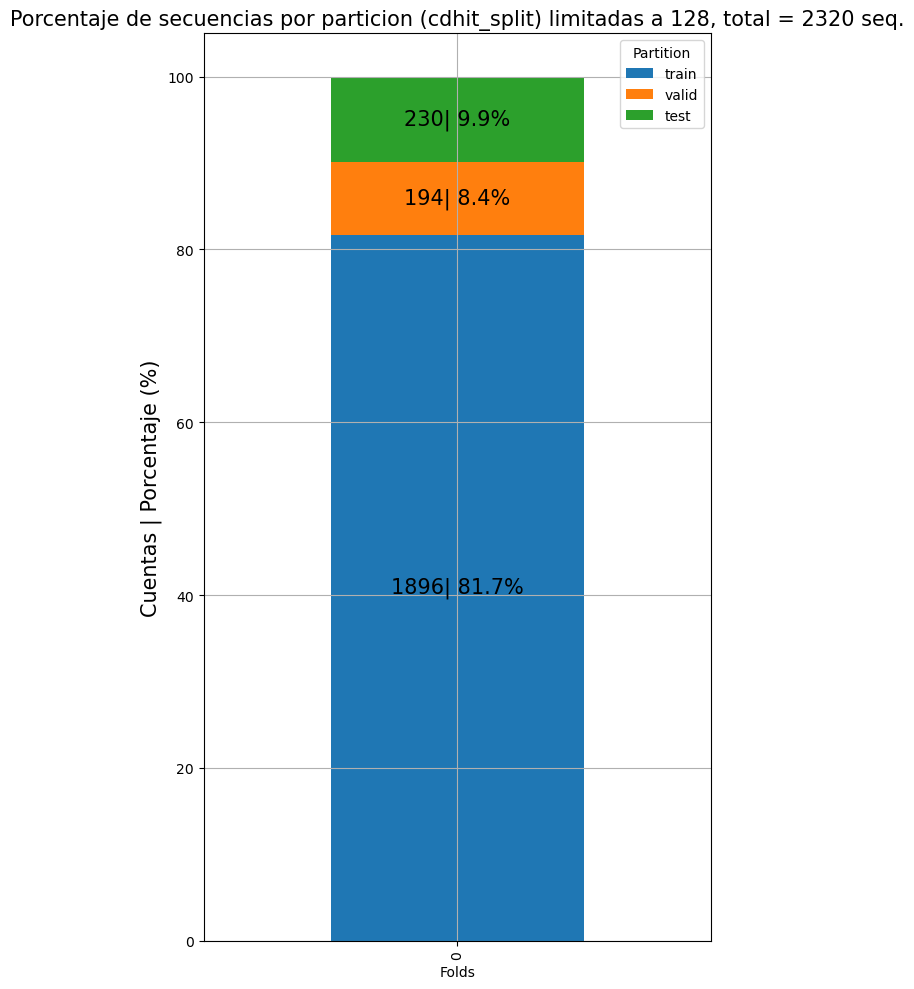

In [35]:
# Grafico de barras apiladas en forma porcentual 
 
df_grouped = df_splits[df_splits['fold']==0].groupby(['fold', 'partition'])['id'].count().reset_index().sort_values('id')

df_grouped['percentage'] = df_grouped['id'] / 2320 * 100
pivot_df = df_grouped.pivot(index='fold', columns='partition', values='percentage')
pivot_df = pivot_df[['train', 'valid', 'test']]  # Orden explícito de las columnas

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 10))
bars = pivot_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

# Agregar valores numéricos a las barras
for container in bars.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Mostrar solo si hay un valor
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición X
                bar.get_y() + height / 2,  # Posición Y
                f'{height*2320/100:.0f}| {height:.1f}%',  # Valor a mostrar
                ha='center', va='center', fontsize=15, color='black'
            )

# Configuración del gráfico
plt.title("Porcentaje de secuencias por particion (cdhit_split) limitadas a 128, total = 2320 seq.", fontsize=15)
plt.xlabel("Folds")
plt.ylabel("Cuentas | Porcentaje (%)", fontsize=15)
plt.legend(title="Partition",bbox_to_anchor=(1,1)) 
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()



In [ ]:
df_train_grouped[df_train_grouped['fold']==0]

/tmp/ipykernel_681247/3399234418.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(combined_df,
/tmp/ipykernel_681247/3399234418.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_folds = len(pivot_df_pct.groupby('dataset').first())


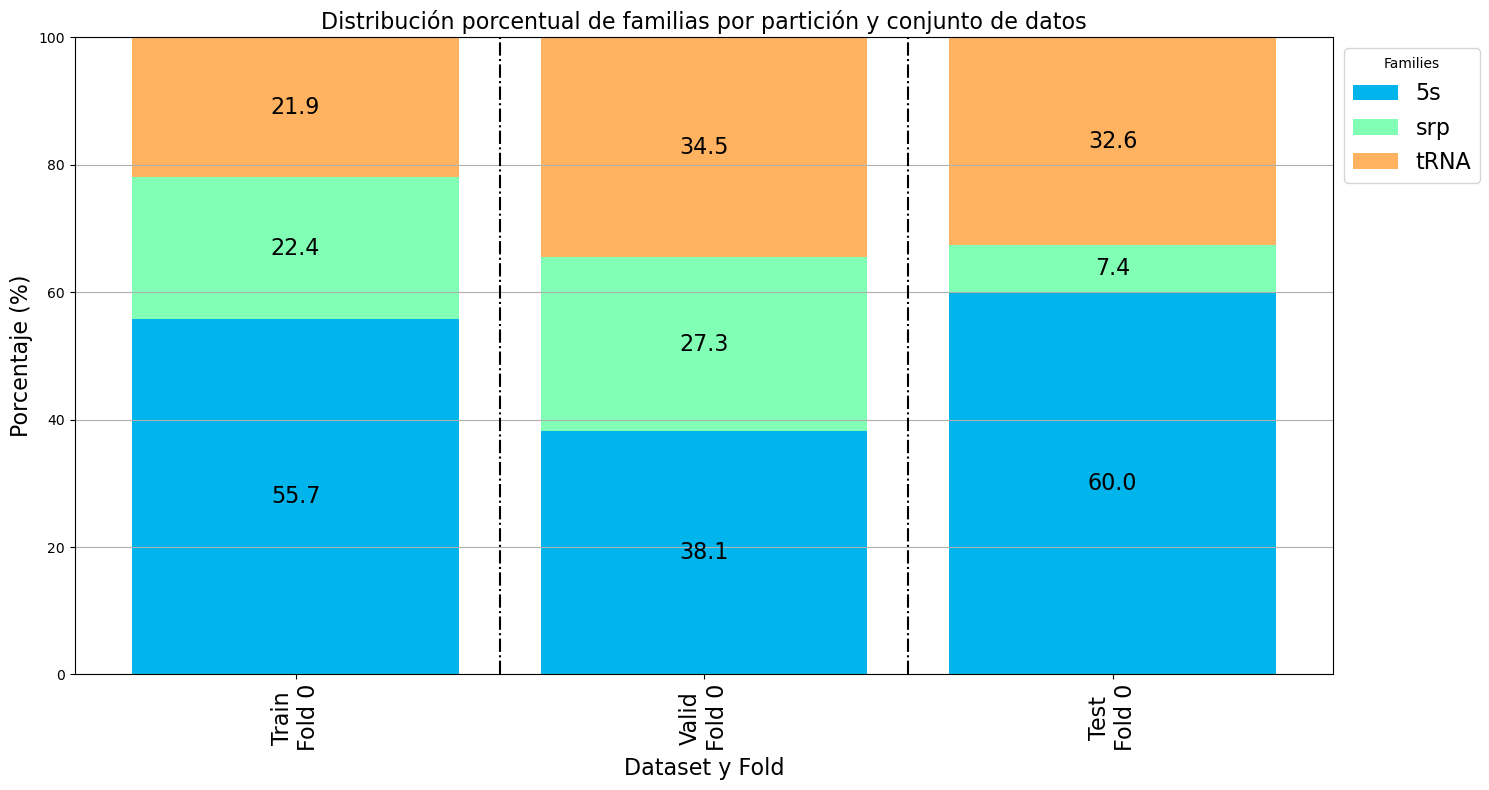

In [29]:


# Preparamos los datos
train_data = df_train_grouped[df_train_grouped['fold']==0].copy()
train_data['dataset'] = 'Train'
valid_data = df_valid_grouped[df_valid_grouped['fold']==0].copy()
valid_data['dataset'] = 'Valid'
test_data = df_test_grouped[df_test_grouped['fold']==0].copy()
test_data['dataset'] = 'Test'

# Concatenamos los dataframes y ordenamos
combined_df = pd.concat([train_data, valid_data, test_data])
combined_df['dataset'] = pd.Categorical(combined_df['dataset'], 
                                      categories=['Train', 'Valid', 'Test'],
                                      ordered=True)
combined_df = combined_df.sort_values(['dataset', 'fold'])

# Creamos el pivot table
pivot_df = pd.pivot_table(combined_df,
                         index=['dataset', 'fold'],
                         columns='fam',
                         values='id',
                         aggfunc='sum',
                         fill_value=0)

# Normalizar los valores a porcentajes
pivot_df_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_pct = pivot_df_pct.reset_index()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# Obtener las familias únicas (columnas)
families = [col for col in pivot_df_pct.columns if col not in ['dataset', 'fold']]


colors = sns.color_palette("rainbow", len(families))  
# Inicializar el bottom para las barras apiladas
bottom = np.zeros(len(pivot_df_pct))

# Crear las barras apiladas para cada familia
for fam, color in zip(families, colors):
    bars = ax.bar(
        range(len(pivot_df_pct)),
        pivot_df_pct[fam],
        bottom=bottom,
        label=fam,
        color=color
    )
    # Agregar los valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 1:  # Solo mostrar valores mayores al 1%
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bottom[i] + height/2,
                f'{height:.1f}',
                ha='center', va='center',
                fontsize=16, color='black'
            )
    
    bottom += pivot_df_pct[fam]

# Configurar los ticks del eje x
xticks = range(len(pivot_df_pct))

# Crear etiquetas personalizadas
xlabels = []
current_dataset = None
for _, row in pivot_df_pct.iterrows():
    if current_dataset != row.dataset:
        xlabels.append(f'{row.dataset}\nFold {row.fold}')
        current_dataset = row.dataset
    else:
        xlabels.append(f'Fold {row.fold}')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=90, fontsize=16)

# Agregar líneas verticales para separar los datasets
n_folds = len(pivot_df_pct.groupby('dataset').first())
current_pos = 0
for dataset in ['Train', 'Valid']:
    current_pos += len(pivot_df_pct[pivot_df_pct['dataset'] == dataset])
    ax.axvline(x=current_pos - 0.5, color='black', linestyle='-.')

# Configuración del gráfico
plt.title("Distribución porcentual de familias por partición y conjunto de datos", fontsize=16)
plt.xlabel("Dataset y Fold", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=16)
ax.set_ylim(0, 100)
plt.legend(title="Families", bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [37]:
8*128

1024